# Training model

In [28]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Understanding the model can help decide the right training model to use, a good set of hyperparemeters for your task.and perform the error analysis more efficiently

## Linear Regression

#### Two ways to train it

1.Using the 'closed form' equation that directly computes the best parameter that minimizes the cost function.

2. Using Gradient descent(GD),And iterative optimization approach.That gradually tweaks the model parameter to minimize the cost function the cost function over the training set.

# <img src='linreg.png'>

### This can be written more concisely using a vectorized form

# <img src='linvec.png'>

How do we train it? The best way of training a model means setting its parameters so thatthe model best fits the training set. for this we need a cost function to check how poorly the model is performing.For this the most common is RMSE in linear regression but in practice it is easier to find the value of theta for MSE that minimizes the cost function. The values of theta that minimizes the MSE also minimizes the RMSE

### THE MSE of a linear regression hypothesis theta not on a training set X is calculated using the following equation.

# <img src='MSE.png'>

# NORMAL EQUATION

to find the value of theta that minizes the MSE. We can use 'closed form' equation. It gives the the value of theta directly.This is called the normal equation

# <img src='normal.png'>

In [12]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.81958997]), array([[3.26763971]]))

#### The disadvantage if Normal equation is it computes the inverse of the transpose. The matrix is N*N therefore the computational cost is O(n^3).Thereofre if we doubles the number of features then it increses the computational cost by 8.  2^3=8.

#### But on the positive side this equation is linear with regard of number of instances in the training set(it is O(m)).so it handles the large training set efficiently provided it can fit in the memory

# Gradient Descent

GD is better suited for the case whe the features and instaces are large to fit in meomery.

GD is avery generic optimization algo capable of finding wide range of problems. The generic idea of GD is to tweak parameter iteratively in order to minimize a cost function

It measures the local gradient of the error function with regards to the parameter vector theta.and it goes in the direction of descending gradient.once gradient is zero,you have reached the minimum.

An important parameter in gradiet descent is the size of the steps.determined by the learning rate hyperparameter.

How to deal with the local minimum problem. Fortunately MSE cost function is convex function.This implies that there are no local minima,just one global minimum.Therefore gradient descent is guaranteed to approach the global minimum.

#### While using gradient descent we should ensure that all features have a similar scale.Or else it will take much longer to converge

## Batch gradient Descent

To implement the gradient descent.you need to compute the gradient of the cost function with regard to the each model parameter theta.ie, WE NEED TO  calculate how much the cost function will change if you change theta little bit. This is called partial derivatives. 

# <img src='partial.png'>

instead of computing these partial derivatives individually. We can use gradient vector to compute partial derivatives all in one go.

# <img src='vc.png'>

In [14]:
X_b=np.c_[np.ones((100,1)),X]

This formula involves calculations over the full training set X, at each Gradient Descent. Therefore makes this algorithm terrible slow.

In [15]:
eta=0.1 #learning rate
n_iterations= 100
m=100

In [16]:
theta= np.random.randn(2,1) #random initialization
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta =theta-eta*gradients

In [17]:
theta

array([[3.65896591],
       [3.40320691]])

How to decide the learning rate? <br>
grid search

how to decide the number of iterations?<br>
If we choose really small then it will be far behind from the minimum. And if it is very high then it will vross the minimum value. SO the best approach is to choose the very high value and inturrupt the algorithm when the gradient vector becomes tiny-that is, when its norm becomes smaller than a tiny norm, called tolerance

# Stochastic Gradient Descent

The main problem with the bathc gradient descent is that. IT TAKES  full training set set at every step, makes it very slow. In opposite extreme stochastic(random)gradient descent picks the random instance in the training set. And computes gradient descent based on that single instance. therefore it is faster than the batch graduent descent. But instead of decreasing gradually it changes values abruptly and reaches minimum faster but du to the randomness nature it keeps on bouncing near the minimum. So it is ALMOST minimum.

When the cost function is very irregular,this can actually help from bouncing from the local minima.Therefore the irregualr cost function has better chance to find the global minima.but negative side is that it can never settle down to the minimum

but how can it negative settle down to the minimum?<br>
We can solve this problem by gradually reducing the learning rate. start bwith the large value and with every step it gets smaller and smaller and helps in settling in gloabal minima. This process is known as simulared annealing.

In [18]:
n_epochs=50
t0,t1=5,50 #learning schedule hyperparameters
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)

In [19]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epch*m+i)
        theta=theta-eta*gradients

NameError: name 'epch' is not defined

In [20]:
theta

array([[ 0.75578949],
       [-2.26323394]])

m=iteration round each round called an epoch

Since the instances are picked randomly,some instacnes may be picked several times per epoch while other may not be picked at all.How do we resolve this<br>
if we want to ensure that algorithm goes through every instance at each epoch,another approach is to shuffle the training set,then go instance by instance,then shuffle it again, and so on.this generally converges more slowly

To perform linear regression using stochastic gradient descent. We can use SGDRegressor class. which defaults to optimizing the mean squared error cost function.

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

TypeError: __init__() got an unexpected keyword argument 'n_iter'

eta0=learning rate<br>
n_iter=epochs

# Mini batch Gradient Descent

In mini batch Gradient Descent. instead of computing the gradient descent based on full training set or on single instance,Mini batch GD computes the gradient descent on small random sets of instance called mini batch. The main advantage is that we can boost fro hardware optimization of matrix operation,If we are using GPU

MINI BATCH GD. is less erratic then SGD. therefore it be closer to the minimum then the SGD,But on the other handit may be harder for it to escape the local minimum.

# <img src='comp.png'>

# Polynomial Regression

What if your data is more complex than a simple straight line? Surprisingly, you can actually use a lnear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features.This techniques is called poltnomial regression.

Lets generate some nonlinear data,based on a simple quadratic equation

In [22]:
m=100 
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

### Clearly, a straight line will never fit this data properly.So lets use scikit learn's polynomialFeatures class to transform our training set. It can be done by passing degree =2 

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([0.88207555])

In [24]:
X_poly[0]

array([0.88207555, 0.77805728])

### NOw X_poly contains the progonal feature of X plus the square of this feature

In [25]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.68203091]), array([[ 2.03534785, -0.85680094]]))

the model estimates y hat=(-.85x1)^2(+2.03x1)+2.68.

The polynomial regression is capable of finding the combination of the features. If we have the feature a and b with degree 2.It would not only add a^2,b^2,but also the combination of ab,ab^2,a^2b.

High degree likely to cause overfitting and plain linear model likely to create underfiting<br>
Then how do we decide what degree to choose?<br>
if model works well on the training data and works bad on validation then it is the case of overfitting.But if the model works poor on both then it is the case of underfiting.

Another way to decide is to use Learning curves: These are the plots of the model performance on the training set and the validation set as a function of the training set size.To generate the model simply train the model several times on different sized subsets of the training data.

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

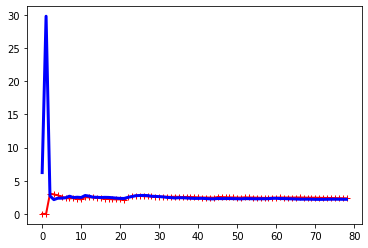

In [34]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

Now lets look at the learning curves of the 10 degree

In [41]:
from sklearn.pipeline import pipeline
polynomial_regression=pipeline((
('poly_features',PolynomialFeaturs(degree=10,include_bias=False)),
('lin_reg',LinearRegression()),
))

ImportError: cannot import name 'pipeline' from 'sklearn.pipeline' (/Users/shivambali/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py)

## The Bias/Variance Tradeoff

In machine learning the errors are categorized in 3 catogories

Bias=This part of genelrization error occurs due to the wrong assumption.A high bias is most likely to underfit the training data<br>
Variance=This part of generization error is cause due to to the hogh sensitivity to small variation in the training det.a model with degree of freedom is likely to have high variance,And thus overfit the training data<br>
Ireeducible error=this error is due to the high noise in data intself. the oly way to reduce this type of error is to clean us the dara.

## How do we reduce the overfitting?

### Regularized Linear Models

A good way to reduce the overfitting is to regularize the model. The feawer the freedom of deegre harder will be to overfit for the model.

In Linear regression is typically achieved by constraining the weights of the model. It can be done by Ridge regression,Lasso Regression and elastic nets

## RIdge Regression

Ridge Regression is regularized version of Linear Regression. It is added in the cost function during the training. and models performance should be evaluated using the unregularized measure.

The hypermeter alpha controls how much regularizaton should be sine.If alpha=0 then rodge regression is just plain linear regression.And if the alpha is very large then the all weights end up very close to zero and the result is the g=flat line going throgh the data mean.

# <img src='ridge.png'>

Ridge regression uses l2 norm of the wieght vector.

#### Ridge regression closed form solution is

# <img src='nridge.png'>

## Ridge regresson in scikit learn

In [43]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[3.72951989]])

### Using SGD

In [44]:

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.85711177])

The penalty l2 indiacates that you wan to use regularization term to the cost function equal to the half of the l2 morm of the weight vector. This is simply ridge regression

## LASSO REGRESSION

This is another regularized version of the Linear Regression.it adds a regularization term to the cost function,but it uses the l1 norm of the weight vector instead of the half the square of the l2 norm

# <img src='lasso.png'>

Another feature of lasso regression that it eliminates the weight of the least important features so it automatically performs the feature selection.

In [45]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.6308914])

#### Lasso using lasso regression. Penality =l1

In [46]:

sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.85029944])

## Elastic NET

Elastic net is the middle ground between Ridge and lasso regression. It is the combination of the Lasso and ridge. WE can control the mix of the regularization.Whe l=0 then it is ridge and when r=1 is lasso regression

What should we use between Ridge, Lasso and Elstic net?<br>
It is good to use some regularization. Therefore ridge is good default. But if some features are reduntant then we should use Lasso since it computes feature elimination<br>
But elastic is better then lasso since lasso behaves erratic when the several features are strongly correlated.

In [48]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([3.64728048])

### l1 ratio corresponds to the mox ratio

# EARLY STOPPING

Another way to regularize iterative learning algorithms such as GD is to stop the training as soon as validation error is at the minimum.This is called early stopping.

In [53]:

from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error 
        best_epoch = epoch
        best_model = clone(sgd_reg)

TypeError: __init__() got an unexpected keyword argument 'n_iter'

With the warm_start=True,it continues trainng where it left instead of restarting from scratch

# Logistic Regression

Logsitic regression is a common model used to evaluate the probabilites that an instace belongs to a certain class. If the probability intsance is greater than 50% then the model is classified as a positive class. for less then 50% it belongs to the negative class.

## ESTIMATING PROBABILIES

It also works like the simple regression model. it gives the weighted sum of the input feature but instead of directly outputting the weighted value the sigmoid function in logistic regression outputs in between 0 and 1

# <img src='sigmo.png'>

# <img src='logit.png'>

## Training and cost function

How logistic regression model is trained?

The objective of the training is to sset the theta so that the model estimates the highest probabilities for positive instance and negative instance

# <img src='cost.png'>

-log(t) approaches very large when t approaches zero,so cost will be very large if the model estimates close to 0 for a positive class.And it will be very large if the model predicts 1 for the negative instance.Similarly -log(t) will be closer ot zero if it predicts 0 for the negative class, also be 0 if it predicts 1 for the positve class

The cost function over the whole training set is just the average cost of all instances. it can be written as

# <img src='costall.png'>

Bad news is that there is no normal equation or closed form eq to find the value of theta that minimizes the cost function.But the logit regression is convex so ot os guatanteed that the GD will fond the optimal theta that minimizes the cost function.

## DECISION BOUNDARY

In [54]:

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target_names', 'feature_names', 'target', 'DESCR']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [56]:

from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

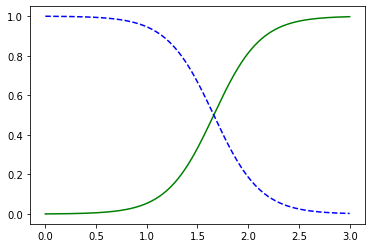

In [57]:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica") # + more Matplotlib code to make the image look pretty

The decision boundary is at 1.6. So anything above 1.6 belongs to green class and below 1.6 belongs to blue dotted class.Accordong to model below 1cm it is confident in blue class and above every 2 it is confident in green class. and between 1 and 2 it seems confused.However if the ask the model to predict class usinf predict() rather then asking predict_proba(),It will return whichever class is most likely.Therefore the desicios boundary is at 1.6 where both probabilities is at 50%.

### Just like other linear models,logistic regression models can be regularized using both l1 and l2 penalties.Scikit learn adds l2 norm by default<br>
the hyperparemet controlling the regularization strength in logistic regression model is not alpha but the inverse of the C. the higher the C less the model is regualrized

## Softmax Regression

The logostic Regression model can be generized to support multiple class directly wothout having to train multiple binary classifier.This is called softmax regression.

# <img src='softmax.png'>

# <img src='softmax1.png'>

# <img src='123.png'>

Just like Logostic regression classifer,the softmax regression classifier predict the highest probabilities

# <img src='srcp.png'>

The argmax function returns the value of the variable that maximizes a function. It returns the value of K that maximizes the estimated probabilities 

The softmax regression classifier predict only one class at a time. There it can be used to classiy the type of plant but not to recognize the multiple people in one picture.

#### Model estimates for soft max?

Minimizing the cost function Called the cross entroopy.It oenalizes the model when it estimates a low probability for a target class.

# <img src='ce.png'>

# <img src='ce1.png'>

lOGISITIC  regression usses onevsall by default when you train on more than two classes.But we can use multi_class hyperparameter to 'multinomial' to switch it to softmax regression instead.We need to specify solver that supports softmax such as 'lbfs' slover.It also applies l2 regularization by default which we can contol using hyperparameter c

In [58]:

X = iris["data"][:, (2, 3)] # petal length, petal width y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [59]:

softiimax_reg.predict([[5, 2]])
array([2])
softmax_reg.predict_proba([[5, 2]])

NameError: name 'array' is not defined